In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
x = digits.data
y = digits.target

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [9]:
print(x[0].reshape(8,8).shape)

(8, 8)


Text(0.5,1,'4')

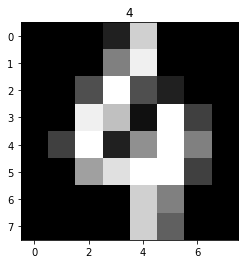

In [13]:
plt.imshow(x[100].reshape(8,8),cmap='gray')
plt.title(y[100])

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y)

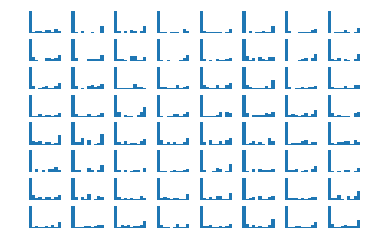

In [23]:
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.hist(x[i])
    plt.axis("off")

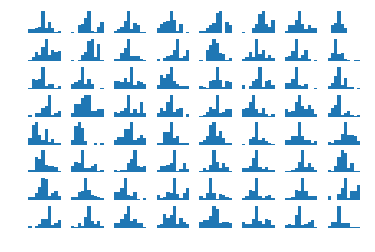

In [24]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.hist(x[i])
    plt.axis("off")

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
model.score(xtest,ytest)

0.9611111111111111

3 3


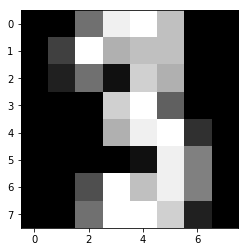

In [31]:
plt.imshow(xtest[5].reshape(8,8),cmap="gray")
ypred = model.predict(xtest)
print(ypred[5],ytest[5])

8 8


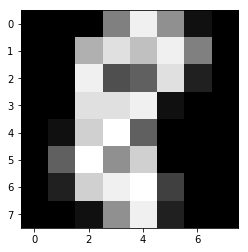

In [36]:
from sklearn import tree
Model=tree.DecisionTreeClassifier()
Model.fit(xtrain,ytrain)
Model.score(xtest,ytest)
plt.imshow(xtest[6].reshape(8,8),cmap="gray")
ypred=Model.predict(xtest)
print(ypred[6],ytest[6])


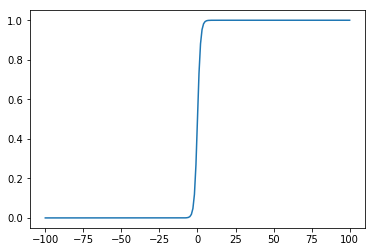

In [38]:
a = np.arange(-100,101)
b = 1 / (1 + np.exp(-a))
plt.plot(a,b)
plt.show()

In [50]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(activation="relu",solver="adam",max_iter=1000)
model_nn.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [51]:
model_nn.score(xtest,ytest)

0.9833333333333333

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

Data=load_breast_cancer()
x=Data.data
y=Data.target

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_test,y_test))

0.9385964912280702


In [67]:
####Decison tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
print(DT.score(x_test,y_test))

0.9210526315789473


In [79]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(activation="relu",solver="adam", epsilon=1e-08,random_state=42)
MLP.fit(x_train,y_train)
print(MLP.score(x_test,y_test))

0.8859649122807017


In [74]:
MLP

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)